<div class="output_png output_subarea output_execute_result">
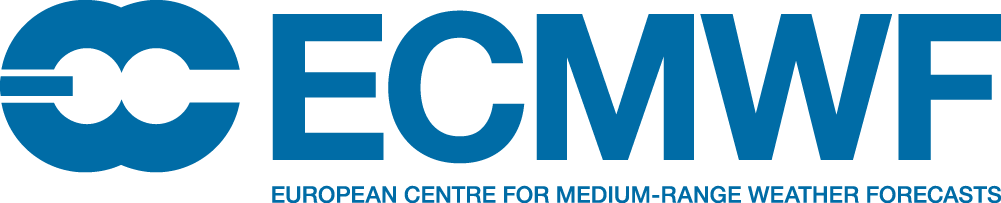
</div>

# (EXPERIMENTAL) Thermal stress (Thermofeel)

This notebook will provide you guidance how to explore ECMWF data to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-thermofeel 


<div class="output_png output_subarea output_execute_result">
<center>
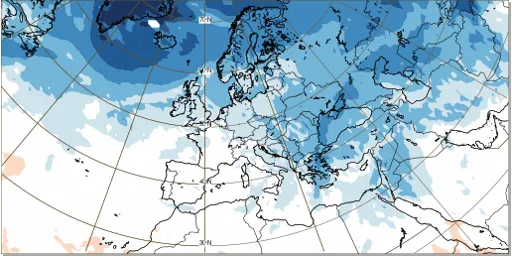
</div>

Some ECMWF real-time products are governed by the [ECMWF Standard Licence Agreement](https://www.ecmwf.int/sites/default/files/ECMWF_Standard_Licence.pdf) and are not free or open. Access to these products depends on your use case. To find out which licence applies to you, please visit: [Use cases and licence conditions page](https://www.ecmwf.int/en/forecasts/accessing-forecasts/licences-available).  

To find out how to obtain the access to the ECMWF forecast data please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product visualises 5 parameters separately:

* [Universal thermal climate index](https://codes.ecmwf.int/grib/param-db/261001)
* [Humidex](https://codes.ecmwf.int/grib/param-db/261016)
* [Wet bulb globe temperature](https://codes.ecmwf.int/grib/param-db/261014)
* [Heat index](https://codes.ecmwf.int/grib/param-db/260004)
* [Wind chill factor](https://codes.ecmwf.int/grib/param-db/260005)

In this example, we will use: 
- [**ecmwf-api-client**](https://pypi.org/project/ecmwf-api-client/) to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next two cells.
</div>

In [1]:
#!pip install ecmwf-api-client

In [1]:
#!conda install metview metview-python

In [1]:
import metview as mv
from ecmwfapi import *
import requests

In [2]:
filename = 'medium-thermofeel.grib'

If you already have the access to the ECMWF archived forecast data, you can use the next cell to download data from the [MARS archive](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation):

In [ ]:
server = ECMWFService("mars")
server.execute(
    {
    "class": "od",
    "date": "0",
    "expver": "1",
    "levtype": "sfc",
    "param": "261001/260004/260005/261014/261016",
    "step": "12",
    "stream": "oper",
    "time": "00",
    "type": "fc",
    "grid": "0.25/0.25"
    },
    filename)

Alternatively we have prepared small sample dataset to explore

In [3]:
url = f"https://sites.ecmwf.int/repository/opencharts-sample-data/{filename}"
r = requests.get(url)
with open(filename, 'wb') as file:
    file.write(r.content)

## Reading and processing the data
Now we can use **Metview's read() function** to read the file.

In [4]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [5]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
heatx,surface,0,20250728,0,12,None,260004,od,oper,fc,0001
hmdx,surface,0,20250728,0,12,None,261016,od,oper,fc,0001
utci,surface,0,20250728,0,12,None,261001,od,oper,fc,0001
wbgt,surface,0,20250728,0,12,None,261014,od,oper,fc,0001
wcf,surface,0,20250728,0,12,None,260005,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [6]:
data.describe('utci')

shortName,utci
name,Universal thermal climate index
paramId,261001
units,K
typeOfLevel,surface
level,0
date,20250728
time,0
step,12
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,utci,surface,0,20250728,0,12,fc,None,regular_ll
1,ecmf,heatx,surface,0,20250728,0,12,fc,None,regular_ll
2,ecmf,wcf,surface,0,20250728,0,12,fc,None,regular_ll
3,ecmf,wbgt,surface,0,20250728,0,12,fc,None,regular_ll
4,ecmf,hmdx,surface,0,20250728,0,12,fc,None,regular_ll


The grib file contains both parameters, and we will use the select() function to filter what we need.

In [8]:
utci = data.select(shortName= 'utci')
wcf = data.select(shortName= 'wcf')
heatx = data.select(shortName= 'heatx')
wbgt = data.select(shortName= 'wbgt')
hmdx = data.select(shortName= 'hmdx')

## Plotting the data
And finally, we can plot the data on the map.  
First we will plot the Universal thermal climate index.

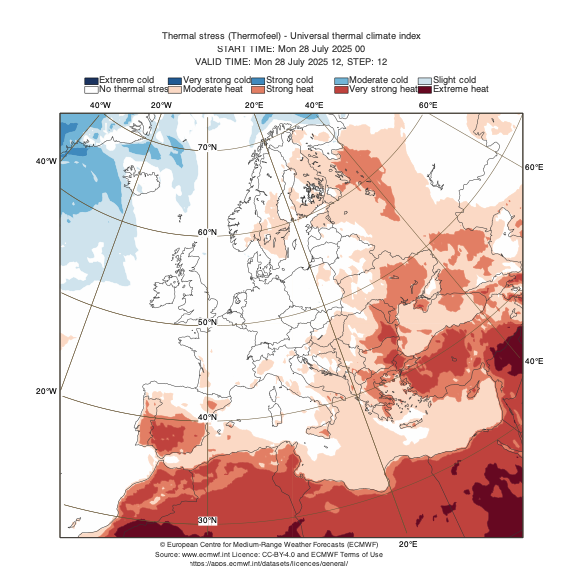

In [9]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
utci_style = mv.mcont(legend= "on",
    contour = "off",
    contour_hilo = "off",
    contour_label = "off",
    contour_legend_text = "Blue/Red",
    contour_level_list = [173.15, 233.15, 246.15, 260.15, 273.15, 282.15, 299.15, 305.15, 311.15, 319.15, 373.15],
    contour_level_selection_type = "level_list",
    contour_shade = "on",
    contour_shade_colour_list = ["#1b335f", "#215a94", "#3f8abe", "#72B6D8", "#D0E4EE", "#ffffff", "#FCDAC6", "#e37e64", "#c0423d", "#660821"],
    contour_shade_colour_method = "list",
    contour_shade_method = "area_fill")

legend = mv.mlegend(legend_column_count = 5,
    legend_display_type = "disjoint",
    legend_entry_text_width = "80",
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Extreme cold", "Very strong cold", "Strong cold", "Moderate cold", "Slight cold", "No thermal stress", "Moderate heat", "Strong heat", "Very strong heat", "Extreme heat"])
title = mv.mtext(
    text_lines = ["Thermal stress (Thermofeel) - Universal thermal climate index",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' /> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                  "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                  "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, utci, utci_style, legend, title, ecmwf_text)

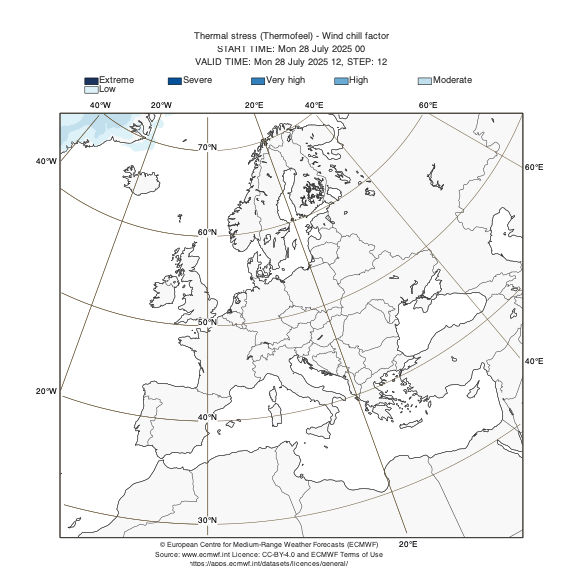

In [10]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="#f9f9f9",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
wcf_style = mv.mcont(legend= "on",
    contour = "off",
    contour_hilo = "off",
    contour_label = "off",
    contour_level_list = [173.15, 218.15, 225.15, 233.15, 245.15, 263.15, 273.15],
    contour_level_selection_type = "level_list",
    contour_shade = "on",
    contour_shade_colour_list = ["#1b335f", "#05529b", "#3181bd", "#6badd5", "#C3E0EF", "#DEF2F9"],
    contour_shade_colour_method = "list",
    contour_shade_method = "area_fill")

legend = mv.mlegend(legend_column_count = 5,
    legend_display_type = "disjoint",
    legend_entry_text_width = "80",
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Extreme", "Severe", "Very high", "High", "Moderate", "Low"])
title = mv.mtext(
    text_lines = ["Thermal stress (Thermofeel) - Wind chill factor",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' /> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                  "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                  "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, wcf, wcf_style, legend, title, ecmwf_text)

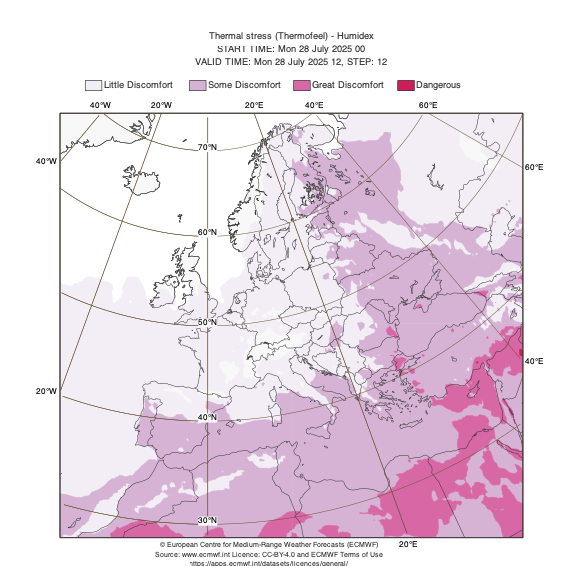

In [11]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="#f9f9f9",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
hmdx_style = mv.mcont(legend= "on",
    contour = "off",
    contour_hilo = "off",
    contour_label = "off",
    contour_level_list = [293.15, 303.15, 313.15, 319.15, 373.15],
    contour_level_selection_type = "level_list",
    contour_shade = "on",
    contour_shade_colour_list = ["#f4eff7", "#d7b4d6", "#d967a7", "#cd1e58"],
    contour_shade_colour_method = "list",
    contour_shade_method = "area_fill")

legend = mv.mlegend(legend_column_count = 4,
    legend_display_type = "disjoint",
    legend_entry_text_width = "80",
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Little Discomfort", "Some Discomfort", "Great Discomfort", "Dangerous"])
title = mv.mtext(
    text_lines = ["Thermal stress (Thermofeel) - Humidex",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' /> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                  "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                  "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, hmdx, hmdx_style, legend, title, ecmwf_text)

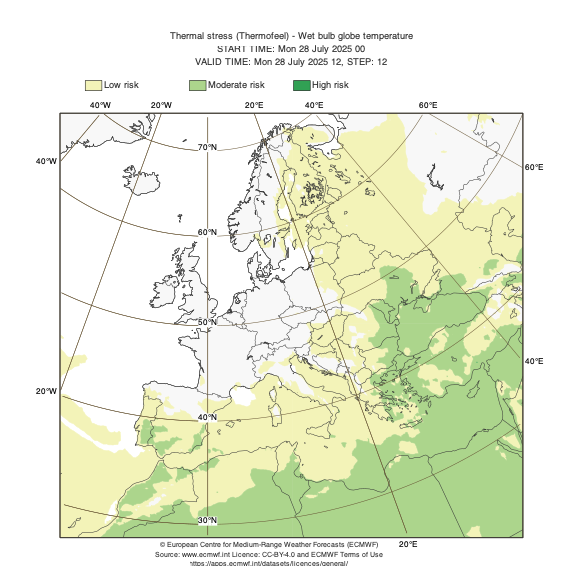

In [12]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="#f9f9f9",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
wbgt_style = mv.mcont(legend= "on",
    contour = "off",
    contour_hilo = "off",
    contour_label = "off",
    contour_level_list = [293.15, 298.15, 304.15, 373.15],
    contour_level_selection_type = "level_list",
    contour_shade = "on",
    contour_shade_colour_list = ["#f4f4b9", "#add68d", "#31a254"],
    contour_shade_colour_method = "list",
    contour_shade_method = "area_fill")

legend = mv.mlegend(legend_column_count = 4,
    legend_display_type = "disjoint",
    legend_entry_text_width = "80",
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Low risk", "Moderate risk", "High risk"])
title = mv.mtext(
    text_lines = ["Thermal stress (Thermofeel) - Wet bulb globe temperature",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' /> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                  "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                  "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, wbgt, wbgt_style, legend, title, ecmwf_text)

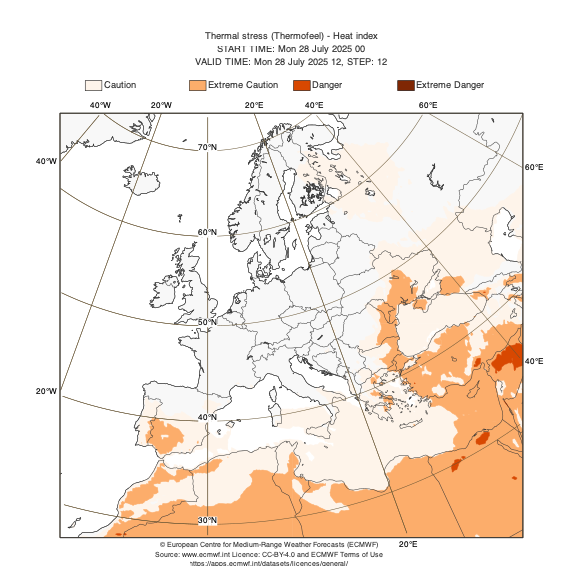

In [13]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="#f9f9f9",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
heatx_style = mv.mcont(legend= "on",
    contour = "off",
    contour_hilo = "off",
    contour_label = "off",
    contour_level_list = [299.85, 305.35, 312.55, 324.25, 373.15],
    contour_level_selection_type = "level_list",
    contour_shade = "on",
    contour_shade_palette_name = "colorbrewer_Oranges_4_r",
    contour_shade_colour_method = "palette",
    contour_shade_method = "area_fill")

legend = mv.mlegend(legend_column_count = 4,
    legend_display_type = "disjoint",
    legend_entry_text_width = "80",
    legend_text_colour = "charcoal",
    legend_text_font_size = "40%",
    legend_text_composition = "user_text_only",
    legend_user_lines = ["Caution", "Extreme Caution", "Danger", "Extreme Danger"])

title = mv.mtext(
    text_lines = ["Thermal stress (Thermofeel) - Heat index",
                  "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' /> ",
                  "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                  "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                  "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, heatx, heatx_style, legend, title, ecmwf_text)

To generate the png file you can run the following cell.

In [14]:
png = mv.png_output(
    output_name = "medium-thermofeel-utci",    # specify relative or full path
    output_title = "medium-thermofeel-utci",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, utci, utci_style, legend, title, ecmwf_text)

In [15]:
png = mv.png_output(
    output_name = "medium-thermofeel-wcf",    # specify relative or full path
    output_title = "medium-thermofeel-wcf",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, wcf, wcf_style, legend, title, ecmwf_text)

In [16]:
png = mv.png_output(
    output_name = "medium-thermofeel-hmdx",    # specify relative or full path
    output_title = "medium-thermofeel-hmdx",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, hmdx, hmdx_style, legend, title, ecmwf_text)

In [17]:
png = mv.png_output(
    output_name = "medium-thermofeel-wbgt",    # specify relative or full path
    output_title = "medium-thermofeel-wbgt",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, wbgt, wbgt_style, legend, title, ecmwf_text)

In [ ]:
png = mv.png_output(
    output_name = "medium-thermofeel-heatx",    # specify relative or full path
    output_title = "medium-thermofeel-heatx",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, heatx, heatx_style, legend, title, ecmwf_text)

Note that plot produced using this dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
The data used here is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.